Get andrew vlasic's paper.Use his dataset and plot ruggedness

In [ ]:
from itertools import permutations,combinations
from math import perm as n_perm, comb as n_comb
import kagglehub
from kagglehub import KaggleDatasetAdapter
#FIXME implement these methods from scratch, cache probs
from infomeasure import mutual_information as mi, conditional_mutual_information as cmi

In [ ]:
import numpy as np
np.seed(1)

In [ ]:
# Set the path to the file you'd like to load
file_path = "Participants_Data_WH18/Train.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "arbazkhan971/anomaly-detection",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)


/tmp/ipykernel_629257/2387679091.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 81.5k/81.5k [00:00<00:00, 3.25MB/s]

Extracting zip of Train.csv...


First 5 records:    feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0        100        160     1.6000          0          0          0   
1         20         83     4.1500          1          0          0   
2         99        150     1.5151          1          0          0   
3         40         40     1.0000          0          0          0   
4         12        234    19.5000          1          0          0   

   feature_7  feature_8  feature_9  feature_10  ...  feature_1550  \
0          0          0          0           0  ...             0   
1          0          0          0           1  ...             0   
2          0          0          0           0  ...             0   
3          0          0          0           0  ...             0   
4          0          0          0           0  ...             0   

   feature_1551  feature_1552  feature_1553  feature_1554  feature_1555  \
0             0             0             0             0         

In [8]:
df["Class"].value_counts()

Class
0    1620
1     143
Name: count, dtype: int64

In [15]:
df.drop(columns="Class").isna().any(axis=None)

np.False_

In [16]:
df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100,160,1.6000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,83,4.1500,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,99,150,1.5151,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40,40,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,234,19.5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,1,1,2.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1759,40,200,5.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1760,96,218,2.2708,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1761,16,81,5.0625,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: ylabel='Frequency'>

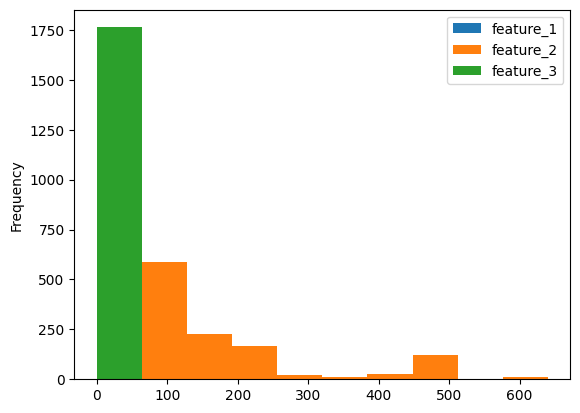

In [ ]:
df[[col for col in df.columns][:3]].plot.hist()

<Axes: ylabel='Frequency'>

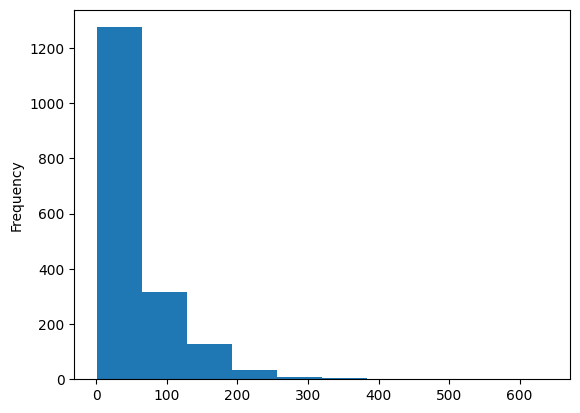

In [27]:
df["feature_1"].plot.hist()

<Axes: ylabel='Count'>

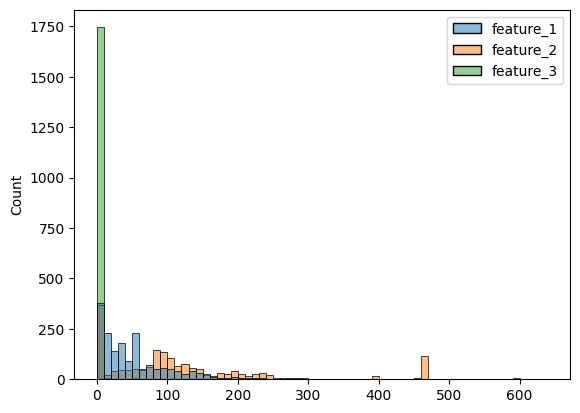

In [28]:
import seaborn as sns 
sns.histplot(df[[col for col in df.columns][:3]])

In [ ]:
#TODO try different kernels, bandwidths
kwargs = dict(approach="kernel", bandwidth=0.8, kernel="box", workers=-1)

In [ ]:
from tqdm import tqdm
mi_y = {}
X = df.drop(columns="Class")
y = df["Class"]

for col in tqdm(X.columns):
    mi_y[col] = mi(X[col],y,**kwargs)



  0%|          | 0/1558 [00:00<?, ?it/s]

100%|██████████| 1558/1558 [00:20<00:00, 76.25it/s]


In [61]:
#MI is symmetric. Also, the BQM will add symmetric pairs and store it under a single key
col_pairs = combinations(X.columns,2)
unique_info = {}
redundancy = {}
tot = n_comb(len(X.columns),2)
for pair in tqdm(col_pairs,total=tot):
    col1,col2 = pair
    unique_info[pair] = cmi(df[col1], y, cond=df[col2],**kwargs)
    redundancy[pair] = cmi(df[col1],df[col2],cond=y,**kwargs)




100%|██████████| 1212903/1212903 [8:09:12<00:00, 41.32it/s]  


In [74]:
unique_info_lines = [{"features": [k[0],k[1]], "unique_info": round(float(v),8)} for k,v in tqdm(unique_info.items())]
redundancy_lines = [{"features": [k[0],k[1]], "redundancy": round(float(v),8)} for k,v in tqdm(redundancy.items())]

100%|██████████| 1212903/1212903 [00:03<00:00, 320435.58it/s]


In [77]:
import json
import os
save_path = "./data"
if not os.path.exists(save_path):
    os.makedirs(save_path,exist_ok=True)

with open(os.path.join(save_path, "miy_unique_redund.json"),"w") as f:
    json.dump({"mi_y": mi_y, "unique_info": unique_info_lines,"redundancy": redundancy_lines},f)

In [ ]:
#TODO build a few different BQMS